# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# Add base url
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Temp in Fahrenheit
units = "Imperial"

# Create sets and records counter
sets = 1
records = 1

# Set up lists to hold response information (empty lists)
lat = []
lon = []
max_temp= []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_name = []

# # Begin Data Retrieval process..
# print('Start of Data Retrieval')
# print('----------------------------')

# Loop through each city and make API request
for city in cities:
    query = url + '&appid=' + weather_api_key + '&units=' + units + '&q='
    response = requests.get(query + city).json()
   
    # Try and except from list of cities given at random
    try:
        print(f'Processing Record {records} of Set {sets} | {city}')
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(city)
    except:
        print(f'City not found, Skipping..')
        pass
    
    # Records/sets counter (by 45)
    records = records + 1
    if records == 45:
        records = 0 
        sets = sets + 1
# End data Retrieval Process
print('----------------------------')
print('End of Data Retrieval')
print('----------------------------')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# Create Dataframe from above results
cities_df = pd.DataFrame({'City': city_name, 
                          'Lat': lat, 
                          'Lng': lon, 
                          'Max Temp': max_temp, 
                          'Humidity': humidity, 
                          'Cloudiness': cloudiness, 
                          'Wind Speed': wind_speed, 
                          'Country': country, 
                          'Date': date
                         })

# Export new Dataframe into a csv
cities_df.to_csv("../output_data/cities.csv", index=False)

# Read Dataframe with pandas for later use
file = os.path.join('..', 'output_data', 'cities.csv')
cities_df = pd.read_csv(file)

# Display the Dataframe
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,quesnel,52.9999,-122.5029,28.40,100,90,2.06,CA,1612573797
1,kalat,29.0225,66.5916,34.57,51,0,1.86,PK,1612573798
2,kapaa,22.0752,-159.3190,71.60,56,1,5.75,US,1612573634
3,oruro,-17.9833,-67.1500,52.79,63,28,14.45,BO,1612573718
4,longyearbyen,78.2186,15.6401,28.40,69,75,16.11,SJ,1612573798


# Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
# Checking to see if there are any cities with humidity greater than 100 with search loc function
humidity_check = cities_df['Humidity'].loc[cities_df['Humidity'] > 100]
humidity_check # no cities over 100

Series([], Name: Humidity, dtype: int64)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

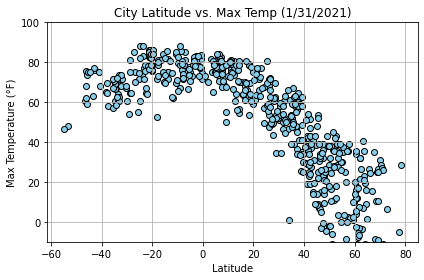

In [23]:
# Add in x and y values from cities Dataframe
x_values = cities_df['Lat']
y_values = cities_df['Max Temp']
degree_sym = u'\N{DEGREE SIGN}'

# Create scatter plot for lat vs. temp
plt.scatter(x_values, y_values, color='skyblue', edgecolors='black')

# Set labels and limits for scatter
plt.title('City Latitude vs. Max Temp (1/31/2021)')
plt.xlabel('Latitude')
plt.ylabel(f'Max Temperature ({degree_sym}F)')
plt.grid()
plt.ylim(-10, 100)

# Save plot in output_data
plt.savefig('../output_data/Lat_vs_Temp.png')

# Display scatter plot
plt.tight_layout()
plt.show()

The code above is displaying a graph of the relationship between latitude and temperatures in the randomly selected cities. '0' latitude (along the x-axis) depicts the equator line.

## Latitude vs. Humidity Plot

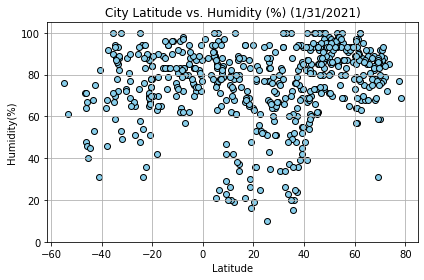

In [24]:
# Add in x and y values from cities Dataframe
x_values = cities_df['Lat']
y_values = cities_df['Humidity']

# Create scatter plot for lat vs. humidity
plt.scatter(x_values, y_values, color='skyblue', edgecolors='black')

# Set labels and limits for scatter
plt.title('City Latitude vs. Humidity (%) (1/31/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()
plt.ylim(0, 105)

# Save plot in output_data
plt.savefig('../output_data/Lat_vs_Humidity.png')

# Display scatter plot
plt.tight_layout()
plt.show()

The code above is displaying a graph of the relationship between latitude and humidity percentages in the randomly selected cities. '0' latitude (along the x-axis) depicts the equator line.

## Latitude vs. Cloudiness Plot

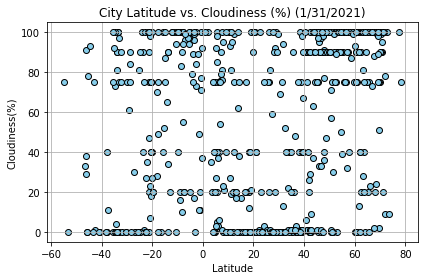

In [25]:
# Add in x and y values from cities Dataframe
x_values = cities_df['Lat']
y_values = cities_df['Cloudiness']

# Create scatter plot for lat vs. cloudiness
plt.scatter(x_values, y_values, color='skyblue', edgecolors='black')

# Set labels and limits for scatter
plt.title('City Latitude vs. Cloudiness (%) (1/31/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()
plt.ylim(-5, 105)

# Save plot in output_data
plt.savefig('../output_data/Lat_vs_Cloudiness.png')

# Display scatter plot
plt.tight_layout()
plt.show()

The code above is displaying a graph of the relationship between latitude and cloudiness percentages in the randomly selected cities. '0' latitude (along the x-axis) depicts the equator line.

## Latitude vs. Wind Speed Plot

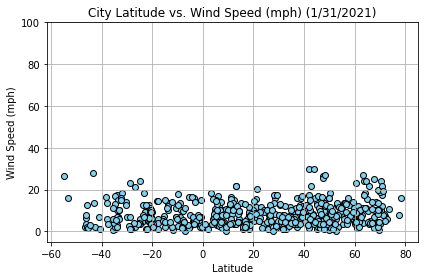

In [27]:
# Add in x and y values from cities Dataframe
x_values = cities_df['Lat']
y_values = cities_df['Wind Speed']

# Create scatter plot for lat vs. wind speed
plt.scatter(x_values, y_values, color='skyblue', edgecolors='black')

# Set labels and limits for scatter
plt.title('City Latitude vs. Wind Speed (mph) (1/31/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.ylim(-5, 100)

# Save plot in output_data
plt.savefig('../output_data/Lat_vs_WindSpeed.png')

# Display scatter plot
plt.tight_layout()
plt.show()

The code above is displaying a graph of the relationship between latitude and wind speeds (mph) in the randomly selected cities. '0' latitude (along the x-axis) depicts the equator line.

## Linear Regression

In [28]:
# Locate Northern Hemisphere Latitude with loc search function
north_lat = cities_df.loc[cities_df['Lat'] >= 0, :] 

# Locate Southern Hemisphere Latitude with loc search funciton
south_lat = cities_df.loc[cities_df['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.8695542071088145


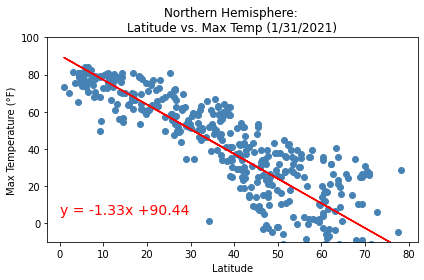

In [29]:
# Add in x and y values from Northern Hemisphere Dataframe
x_values = north_lat['Lat']
y_values = north_lat['Max Temp']
degree_sym = u'\N{DEGREE SIGN}'

# Perform a linear regression on lat vs temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress = slope * x_values + intercept

# String for line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create plot with lineregress for lat vs. temp
plt.scatter(x_values, y_values, color='steelblue')
plt.plot(x_values, regress, 'r-')

# Set labels and limits for scatter with annotation of line equation
plt.title('Northern Hemisphere: \nLatitude vs. Max Temp (1/31/2021)')
plt.xlabel('Latitude')
plt.ylabel(f'Max Temperature ({degree_sym}F)')
plt.ylim(-10, 100)
plt.annotate(line_eq, (0,5), fontsize=14, color='red')

# Print r value
print(f'The r value is: {rvalue}')

# Save plot in output_data
plt.savefig('../output_data/Lat_vs_Temp_NorthHem.png')

# Display scatter plot
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.5153523365674068


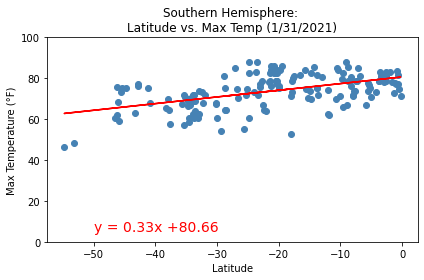

In [30]:
# Add in x and y values from Southern Hemisphere Dataframe
x_values = south_lat['Lat']
y_values = south_lat['Max Temp']
degree_sym = u'\N{DEGREE SIGN}'

# Perform a linear regression on lat vs temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress = slope * x_values + intercept

# String for line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create plot with lineregress for lat vs. temp
plt.scatter(x_values, y_values, color='steelblue')
plt.plot(x_values, regress, 'r-')

# Set labels and limits for scatter with annotation of line equation
plt.title('Southern Hemisphere: \nLatitude vs. Max Temp (1/31/2021)')
plt.xlabel('Latitude')
plt.ylabel(f'Max Temperature ({degree_sym}F)')
plt.ylim(0, 100)
plt.annotate(line_eq, (-50,5), fontsize=14, color='red')

# Print r value
print(f'The r value is: {rvalue}')

# Save plot in output_data
plt.savefig('../output_data/Lat_vs_Temp_SouthHem.png')

# Display scatter plot
plt.tight_layout()
plt.show()

Analysis of Northern and Southern Hemispheres (Latitude vs. Max Temp): 

    * The Northern plot depicts a strong negative relationship between latitude and temperature. This is showing that the further North a city stands from the Equator the colder max tempertaure is. 
    
    * The Southern plot depicts a moderate positive relationship between latitude and temperature. This is adding to the Northern plot's argument. The closer a city stands to the Equator, the higher the max temperature is.  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.2752241328655984


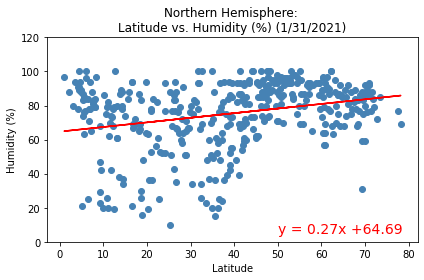

In [31]:
# Add in x and y values from Northern Hemisphere Dataframe
x_values = north_lat['Lat']
y_values = north_lat['Humidity']

# Perform a linear regression on lat vs humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress = slope * x_values + intercept

# String for line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create plot with lineregress for lat vs. humidity
plt.scatter(x_values, y_values, color='steelblue')
plt.plot(x_values, regress, 'r-')

# Set labels and limits for scatter with annotation of line equation
plt.title('Northern Hemisphere: \nLatitude vs. Humidity (%) (1/31/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 120)
plt.annotate(line_eq, (50,5), fontsize=14, color='red')

# Print r value
print(f'The r value is: {rvalue}')

# Save plot in output_data
plt.savefig('../output_data/Lat_vs_Humidity_NorthHem.png')

# Display scatter plot
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.29735239036760197


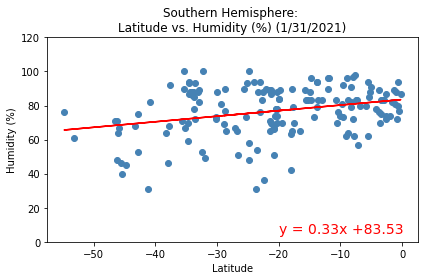

In [32]:
# Add in x and y values from Southern Hemisphere Dataframe
x_values = south_lat['Lat']
y_values = south_lat['Humidity']

# Perform a linear regression on lat vs humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress = slope * x_values + intercept

# String for line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create plot with lineregress for lat vs. humidity
plt.scatter(x_values, y_values, color='steelblue')
plt.plot(x_values, regress, 'r-')

# Set labels and limits for scatter with annotation of line equation
plt.title('Southern Hemisphere: \nLatitude vs. Humidity (%) (1/31/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 120)
plt.annotate(line_eq, (-20,5), fontsize=14, color='red')

# Print r value
print(f'The r value is: {rvalue}')

# Save plot in output_data
plt.savefig('../output_data/Lat_vs_Humidity_SouthHem.png')

# Display scatter plot
plt.tight_layout()
plt.show()

Analysis of Northern and Southern Hemispheres (Latitude vs. Humidity (%)):

    * The Northern plot depicts a weak to moderate positive relationship between latitude and humidity percentage. Humidity does not play as much of a factor the further North a city is from the Equator.  
    
    * The Southern plot depicts a weak positive relationship between latitude and humidity percentage. There is not much of a correlation with humidity and the Equator. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.3587476946825386


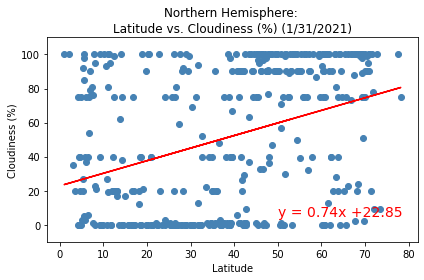

In [33]:
# Add in x and y values from Northern Hemisphere Dataframe
x_values = north_lat['Lat']
y_values = north_lat['Cloudiness']

# Perform a linear regression on lat vs cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress = slope * x_values + intercept

# String for line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create plot with lineregress for lat vs. cloudiness
plt.scatter(x_values, y_values, color='steelblue')
plt.plot(x_values, regress, 'r-')

# Set labels and limits for scatter with annotation of line equation
plt.title('Northern Hemisphere: \nLatitude vs. Cloudiness (%) (1/31/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-10, 110)
plt.annotate(line_eq, (50,5), fontsize=14, color='red')

# Print r value
print(f'The r value is: {rvalue}')

# Save plot in output_data
plt.savefig('../output_data/Lat_vs_Cloudiness_NorthHem.png')

# Display scatter plot
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.29464700274374644


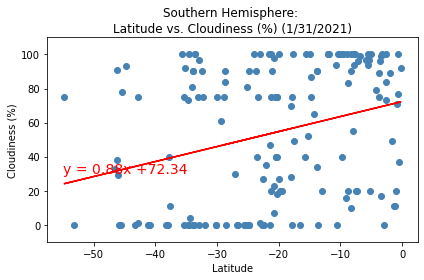

In [34]:
# Add in x and y values from Southern Hemisphere Dataframe
x_values = south_lat['Lat']
y_values = south_lat['Cloudiness']

# Perform a linear regression on lat vs cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress = slope * x_values + intercept

# String for line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create plot with lineregress for lat vs. cloudiness
plt.scatter(x_values, y_values, color='steelblue')
plt.plot(x_values, regress, 'r-')

# Set labels and limits for scatter with annotation of line equation
plt.title('Southern Hemisphere: \nLatitude vs. Cloudiness (%) (1/31/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-10, 110)
plt.annotate(line_eq, (-55,30), fontsize=14, color='red')

# Print r value
print(f'The r value is: {rvalue}')

# Save plot in output_data
plt.savefig('../output_data/Lat_vs_Cloudiness_SouthHem.png')

# Display scatter plot
plt.tight_layout()
plt.show()

Analysis of Northern and Southern Hemispheres (Latitude vs. Cloudiness (%)):

    * The Northern plot depicts a weak to moderate positive relationship between latitude and cloudiness percentage. Cloudiness does not play as much of a factor the further North a city is from the Equator.  
    
    * The Southern plot depicts a weak positive relationship between latitude and humidity percentage. There is not much of a correlation with cloudiness and the Equator. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.1417425467531722


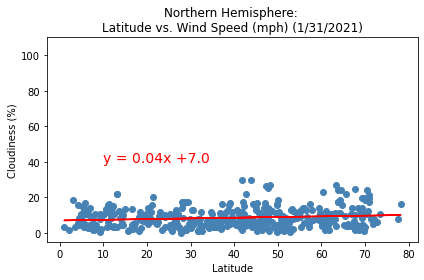

In [35]:
# Add in x and y values from Northern Hemisphere Dataframe
x_values = north_lat['Lat']
y_values = north_lat['Wind Speed']

# Perform a linear regression on lat vs wind speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress = slope * x_values + intercept

# String for line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create plot with lineregress for lat vs. wind speed
plt.scatter(x_values, y_values, color='steelblue')
plt.plot(x_values, regress, 'r-')

# Set labels and limits for scatter with annotation of line equation
plt.title('Northern Hemisphere: \nLatitude vs. Wind Speed (mph) (1/31/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 110)
plt.annotate(line_eq, (10,40), fontsize=14, color='red')

# Print r value
print(f'The r value is: {rvalue}')

# Save plot in output_data
plt.savefig('../output_data/Lat_vs_WindSpeed_NorthHem.png')

# Display scatter plot
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.16989137827885045


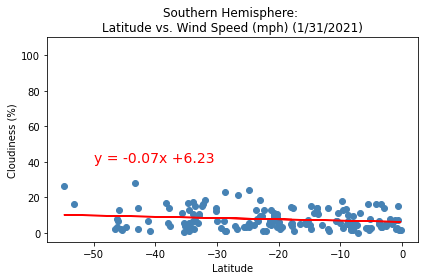

In [36]:
# Add in x and y values from Southern Hemisphere Dataframe
x_values = south_lat['Lat']
y_values = south_lat['Wind Speed']

# Perform a linear regression on lat vs wind speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress = slope * x_values + intercept

# String for line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create plot with lineregress for lat vs. wind speed
plt.scatter(x_values, y_values, color='steelblue')
plt.plot(x_values, regress, 'r-')

# Set labels and limits for scatter with annotation of line equation
plt.title('Southern Hemisphere: \nLatitude vs. Wind Speed (mph) (1/31/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 110)
plt.annotate(line_eq, (-50,40), fontsize=14, color='red')

# Print r value
print(f'The r value is: {rvalue}')

# Save plot in output_data
plt.savefig('../output_data/Lat_vs_WindSpeed_SouthHem.png')

# Display scatter plot
plt.tight_layout()
plt.show()

Analysis of Northern and Southern Hemispheres (Latitude vs. Wind Speed (mph)):

    * The Northern and Southern plots depict a very weak negative relationship between latitude and wind speed. The correaltion is little to none when it comes to wind speed and the distance a city stands from the Equator. 